In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt



In [2]:
data=pd.read_csv("heart.csv")

print("Shape ",data.shape)

data.head(10)

Shape  (918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [3]:
from sklearn.preprocessing import OrdinalEncoder
size= ['Normal', 'ST' ,'LVH']

oe=OrdinalEncoder(categories=[size])
data["RestingECG"] = oe.fit_transform(data[["RestingECG"]])

In [4]:
from sklearn.compose import make_column_transformer

from sklearn.preprocessing import OneHotEncoder

encode=OneHotEncoder()
make_trans=make_column_transformer((OneHotEncoder(), ["Sex","ChestPainType","ExerciseAngina","ST_Slope"]),remainder="passthrough")

#data["RestingECG"]=encode.fit(data[["RetingECG"]])

dummy=pd.get_dummies(data["ChestPainType"],prefix="CPT",dtype=float)
data=pd.concat([data,dummy],axis=1)
data=data.drop(["ChestPainType"],axis=1)

dummy=pd.get_dummies(data["ExerciseAngina"],prefix="EA",dtype=float)
data=pd.concat([data,dummy],axis=1)
data=data.drop(["ExerciseAngina"],axis=1)

dummy=pd.get_dummies(data["Sex"],prefix="s",dtype=float)
data=pd.concat([data,dummy],axis=1)
data=data.drop(["Sex"],axis=1)

dummy=pd.get_dummies(data["ST_Slope"],prefix="SS",dtype=float)
data=pd.concat([data,dummy],axis=1)
data=data.drop(["ST_Slope"],axis=1)

In [5]:
from sklearn.preprocessing import StandardScaler,robust_scale,minmax_scale
x=data.drop(["HeartDisease"],axis=1)
y=data["HeartDisease"]
ss=StandardScaler()
x=ss.fit_transform(x)

In [6]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x ,y, test_size=0.15 , random_state=42)

In [7]:
y_train

65     0
319    1
286    0
611    0
328    1
      ..
106    0
270    0
860    1
435    0
102    1
Name: HeartDisease, Length: 780, dtype: int64

# PREDICTION USING DecisionTreeClassifier

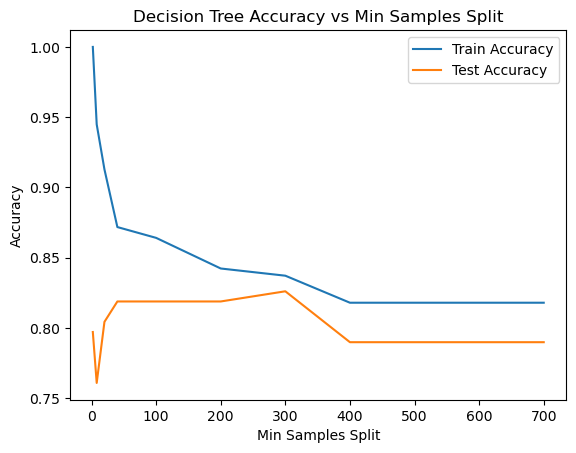

In [8]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
min_samples_split = [2, 8, 20, 40, 100, 200, 300, 400, 500, 600, 700]
max_depth = [2, 4 , 8 , 12 , 16 , 20 , None]

train_accuracy = []
test_accuracy = []

for min_sample in min_samples_split:
    dt = DecisionTreeClassifier(min_samples_split=min_sample, random_state=42)
    dt.fit(X_train, y_train)
    test_train = dt.predict(X_train)
    test_test = dt.predict(X_test)

    train_accuracy.append(accuracy_score(y_train , test_train))
    test_accuracy.append(accuracy_score(y_test , test_test))

plt.plot(min_samples_split, train_accuracy, label='Train Accuracy')
plt.plot(min_samples_split, test_accuracy, label='Test Accuracy')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Min Samples Split')
plt.legend()
plt.show()


Text(0.5, 1.0, 'Decision Tree vs Max Depth')

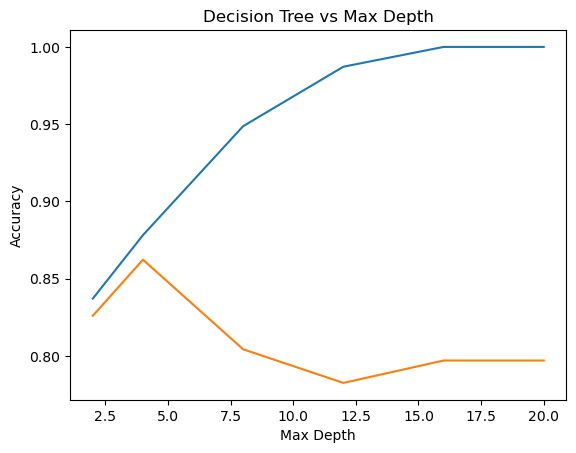

In [9]:
train_accuracy = []
test_accuracy = []

for depth in max_depth:

    dt = DecisionTreeClassifier(max_depth=depth, random_state=42).fit(X_train , y_train )
    train_test = dt.predict(X_train)
    test_test = dt.predict(X_test)

    train_accuracy.append(accuracy_score(y_train , train_test))
    test_accuracy.append(accuracy_score(y_test , test_test))


plt.plot(max_depth , train_accuracy , label="Train Accuracy ")
plt.plot(max_depth , test_accuracy , label = "Test Accuracy " )
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree vs Max Depth")
    

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth= 4 , min_samples_split = 300 , random_state=42).fit(X_train , y_train)

In [11]:
test_pred = dt.predict(X_test)
train_pred = dt.predict(X_train)

In [12]:
from sklearn.metrics import accuracy_score
print(f"Test Accuracy: {accuracy_score(y_test , test_pred)} ")

Test Accuracy: 0.8260869565217391 


In [13]:
print(f"Training Accuracy: {accuracy_score(y_train , train_pred)}")

Training Accuracy: 0.8371794871794872


# PREDICTION USING RandomForestClassifier

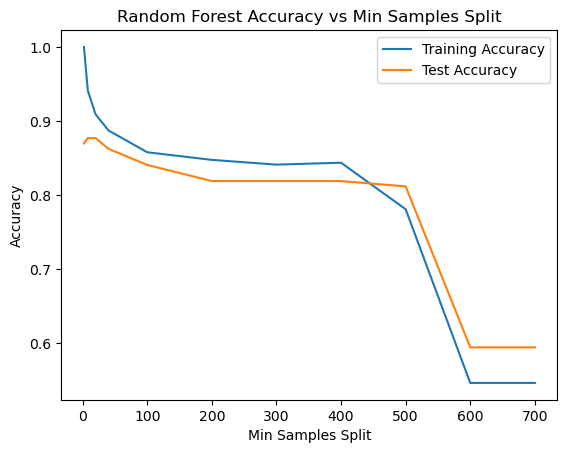

In [14]:
from sklearn.ensemble import RandomForestClassifier

min_samples_split = [2, 8, 20, 40, 100, 200, 300, 400, 500, 600, 700]
estimators = [10, 50, 100, 200, 300, 500, 700, 1000]
train_acc = []
test_acc = []

for min_sample in min_samples_split:
    rf = RandomForestClassifier(min_samples_split=min_sample, random_state=23)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    test_pred = rf.predict(X_test)

    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

plt.plot(min_samples_split, train_acc, label="Training Accuracy")
plt.plot(min_samples_split, test_acc, label="Test Accuracy")
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs Min Samples Split')
plt.legend()
plt.show()


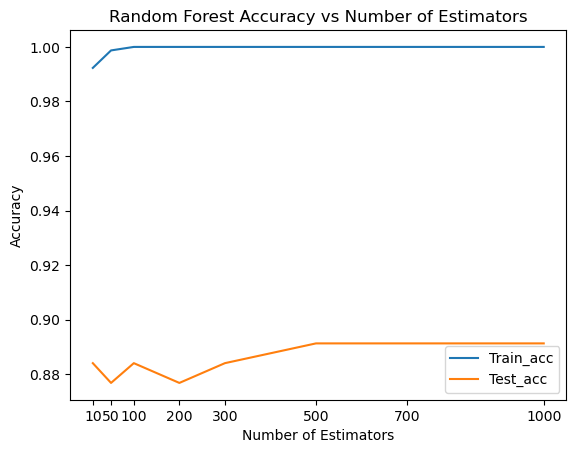

In [15]:
train_acc = []
test_acc = []

for estimator in estimators:
    rf = RandomForestClassifier(n_estimators=estimator, random_state=43)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    test_pred = rf.predict(X_test)

    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

plt.plot(estimators, train_acc, label="Train_acc")
plt.plot(estimators, test_acc, label="Test_acc")
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs Number of Estimators')
plt.xticks(estimators)
plt.legend()
plt.show()


In [16]:
rf = RandomForestClassifier(n_estimators=500 , min_samples_split = 10  , random_state=32)
rf.fit(X_train , y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=500, random_state=32)

In [17]:
train_pred = rf.predict(X_train)
print(f"Train Acc: {accuracy_score(y_train , train_pred)}" )

Train Acc: 0.9320512820512821


In [18]:
test_pred = rf.predict(X_test)
print(f"Test Acc: {accuracy_score(y_test , test_pred)}")

Test Acc: 0.8840579710144928


# PREDICTION USING xgboost

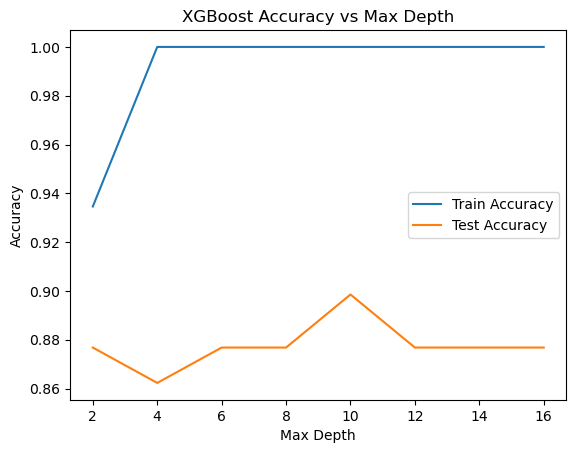

In [19]:

import xgboost as xgb
import matplotlib.pyplot as plt

max_depths = [2, 4, 6, 8, 10, 12, 14, 16]

train_acc = []
test_acc = []

for depth in max_depths:
    xg_clf = xgb.XGBClassifier(max_depth=depth, random_state=43)
    xg_clf.fit(X_train, y_train)
    train_pred = xg_clf.predict(X_train)
    test_pred = xg_clf.predict(X_test)

    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

plt.plot(max_depths, train_acc, label="Train Accuracy")
plt.plot(max_depths, test_acc, label="Test Accuracy")
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy vs Max Depth')
plt.xticks(max_depths)
plt.legend()
plt.show()


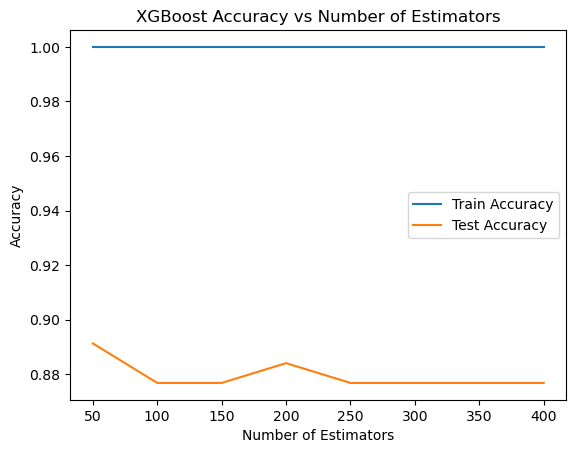

In [20]:
import xgboost as xgb
import matplotlib.pyplot as plt

n_estimators = [50, 100, 150, 200, 250, 300, 350, 400]

train_acc = []
test_acc = []

for n_est in n_estimators:
    xg_clf = xgb.XGBClassifier(n_estimators=n_est, random_state=43)
    xg_clf.fit(X_train, y_train)
    train_pred = xg_clf.predict(X_train)
    test_pred = xg_clf.predict(X_test)

    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

plt.plot(n_estimators, train_acc, label="Train Accuracy")
plt.plot(n_estimators, test_acc, label="Test Accuracy")
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy vs Number of Estimators')
plt.xticks(n_estimators)
plt.legend()
plt.show()


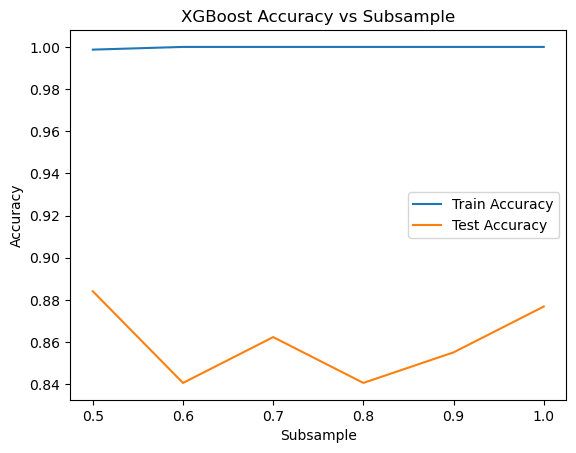

In [21]:
import xgboost as xgb
import matplotlib.pyplot as plt

subsamples = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

train_acc = []
test_acc = []

for subsample in subsamples:
    xg_clf = xgb.XGBClassifier(subsample=subsample, random_state=43)
    xg_clf.fit(X_train, y_train)
    train_pred = xg_clf.predict(X_train)
    test_pred = xg_clf.predict(X_test)

    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

plt.plot(subsamples, train_acc, label="Train Accuracy")
plt.plot(subsamples, test_acc, label="Test Accuracy")
plt.xlabel('Subsample')
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy vs Subsample')
plt.xticks(subsamples)
plt.legend()
plt.show()


In [23]:
train_pred = xc.predict(X_train)
print(f"Train_acc: {accuracy_score(y_train , train_pred)}")

Train_acc: 1.0


In [24]:
test_pred = xc.predict(X_test)
print(f"Test_acc: {accuracy_score(y_test , test_pred)}")

Test_acc: 0.9057971014492754
